In [ ]:
import keras
#from keras.datasets import mnist #import Data
from sklearn.model_selection import train_test_split
from keras.models import Sequential #preparing layres position
from keras.layers import Dense, Dropout, Flatten, Activation  #3 layers
from keras.layers import Conv2D,MaxPooling2D,GRU,Conv1D,MaxPooling1D #convolution & pooling
from tensorflow.keras import utils as np_utils
import numpy as np
np.set_printoptions(threshold=1000,suppress=True)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #graph 2D
import warnings
warnings.filterwarnings('ignore')

#Preprocessing

In [ ]:
epilepsie_data=pd.read_csv('data.csv',sep=',',header=0)
epilepsie_data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
epilepsie_data.shape

(11500, 180)

In [ ]:
features_names=list(epilepsie_data.columns)
features_names

In [ ]:
epilepsie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
epilepsie_data.isnull().sum()

Unnamed: 0    0
X1            0
X2            0
X3            0
X4            0
             ..
X175          0
X176          0
X177          0
X178          0
y             0
Length: 180, dtype: int64

In [ ]:
epilepsie_data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,-5.827478,-6.042174,-6.687304,-7.088870,-7.211217,-7.088261,-6.806696,-6.744696,-6.484783,-6.448435,-6.355391,-6.543130,-6.884348,-6.883217,-6.118870,-5.15913,-4.785652,-4.874783,-5.393565,-5.935478,-6.349913,-6.212522,-5.859826,-5.299826,-4.955652,-5.278087,-6.162261,-7.316609,-7.998522,-7.818870,...,-6.997304,-7.339391,-7.911565,-8.177304,-8.608870,-8.578087,-8.240000,-7.691391,-7.356522,-7.228783,-6.980870,-6.756783,-6.355304,-6.423826,-6.465217,-6.316435,-5.808000,-5.255913,-4.682087,-4.638609,-4.770261,-5.650870,-7.170348,-8.759826,-9.784783,-10.096261,-9.842957,-9.701739,-9.351391,-9.498870,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,160.471017,161.181118,165.071121,169.198359,170.641967,168.930355,164.646296,162.062661,162.571333,162.339911,162.823325,163.909723,165.844176,166.009100,164.715153,162.77423,162.902294,164.799831,165.391697,164.291120,163.165167,163.408052,163.561408,162.548119,160.813772,160.441049,162.881958,166.235164,166.314965,164.513017,...,168.567495,168.662705,167.643458,167.414439,167.922773,168.274009,167.808218,166.739558,165.678558,167.130911,168.156296,167.459868,165.061414,164.248830,166.226332,168.143625,167.067064,166.446540,167.554020,169.418457,170.639171,170.817824,168.145372,166.817974,166.999981,167.756860,166.988820,167.062497,166.606345,165.235574,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,-1765.000000,-1803.000000,-1833.000000,-1867.000000,-1870.000000,-1839.000000,-1867.000000,-1856.000000,-1844.000000,-1717.000000,-1764.000000,-1856.000000,-1844.000000,-1866.000000,-1863.000000,-1866.00000,-1781.000000,-1860.000000,-1818.000000,-1867.000000,-1743.000000,-1517.000000,-1552.000000,-1720.000000,-1864.000000,-1814.000000,-1829.000000,-1851.000000,-1840.000000,-1673.000000,...,-1867.000000,-1826.000000,-1866.000000,-1854.000000,-1789.000000,-1872.000000,-1866.000000,-1675.000000,-1778.000000,-1733.000000,-1862.000000,-1861.000000,-1857.000000,-1839.000000,-1860.000000,-1843.000000,-1863.000000,-1861.000000,-1845.000000,-1820.000000,-1864.000000,-1868.000000,-1855.000000,-1852.000000,-1870.000000,-1847.000000,-1578.000000,-1838.000000,-1763.0000

In [ ]:
epilepsie_data['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [ ]:
epilepsie_data['y'].value_counts(normalize=True)

5    0.2
4    0.2
3    0.2
2    0.2
1    0.2
Name: y, dtype: float64

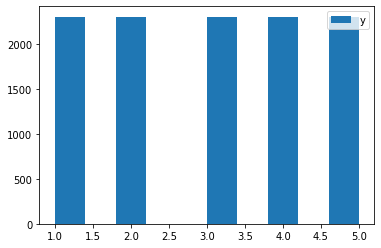

In [ ]:
plt.hist(epilepsie_data['y'],label='y')
plt.legend()

#epilepsie courbes

In [ ]:
epilepsie_data=epilepsie_data.drop(['Unnamed: 0'],axis=1)

In [ ]:
epilepsie_data.shape

(11500, 179)

In [ ]:
ep1=epilepsie_data[epilepsie_data.y==1]
ep2=epilepsie_data[epilepsie_data.y==2]
ep3=epilepsie_data[epilepsie_data.y==3]
ep4=epilepsie_data[epilepsie_data.y==4]
ep5=epilepsie_data[epilepsie_data.y==5]

In [ ]:
a=ep1.iloc[1]
b=ep2.iloc[1]
c=ep3.iloc[1]
d=ep4.iloc[1]
e=ep5.iloc[1]


In [ ]:
a

X1     -278
X2     -246
X3     -215
X4     -191
X5     -177
       ... 
X175   -174
X176   -125
X177    -79
X178    -40
y         1
Name: 8, Length: 179, dtype: int64

<function matplotlib.pyplot.show>

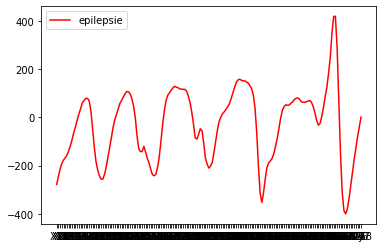

In [ ]:
plt.plot(a,color='red')
plt.tight_layout
plt.gca()
plt.legend(['epilepsie'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

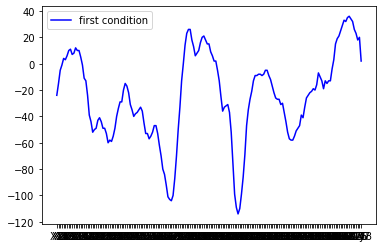

In [ ]:
plt.plot(b,color='blue')
plt.tight_layout
plt.gca()
plt.legend(['first condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

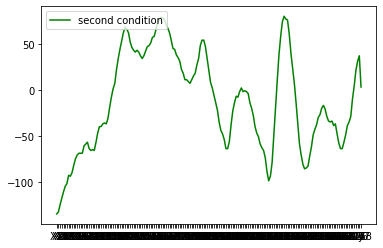

In [ ]:
plt.plot(c,color='green')
plt.tight_layout
plt.gca()
plt.legend(['second condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

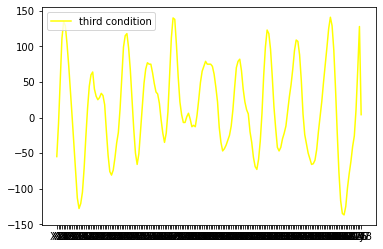

In [ ]:
plt.plot(d,color='yellow')
plt.tight_layout
plt.gca()
plt.legend(['third condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

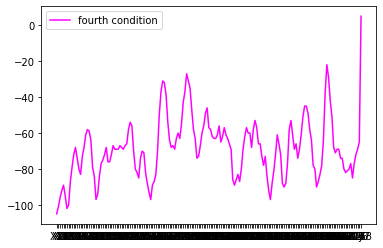

In [ ]:
plt.plot(e,color='magenta')
plt.tight_layout
plt.gca()
plt.legend(['fourth condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

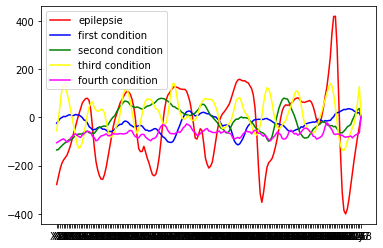

In [ ]:
plt.plot(a,color='red')
plt.plot(b,color='blue')
plt.plot(c,color='green')
plt.plot(d,color='yellow')
plt.plot(e,color='magenta')
plt.tight_layout
plt.gca()
plt.legend(['epilepsie','first condition','second condition','third condition','fourth condition'],loc='upper left')
plt.show

<function matplotlib.pyplot.show>

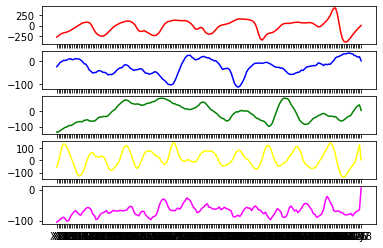

In [ ]:
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
ax1.plot(a,color='red')
ax2.plot(b,color='blue')
ax3.plot(c,color='green')
ax4.plot(d,color='yellow')
ax5.plot(e,color='magenta')
plt.tight_layout
plt.gca()
plt.show

#training

In [ ]:
X=epilepsie_data.iloc[:,0:178]
Y=epilepsie_data['y']
X=X.values
Y=Y.values

In [ ]:
Y

array([4, 1, 5, ..., 5, 3, 4])

In [ ]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.1,random_state=1)

In [ ]:
Xtrain.shape

(10350, 178)

In [ ]:
Xtrain=Xtrain.reshape(Xtrain.shape[0],Xtrain.shape[1],1).astype('float32')
Xtest=Xtest.reshape(Xtest.shape[0],Xtrain.shape[1],1).astype('float32')
input_shape=(Xtrain.shape[1],1)

In [ ]:
Xtrain /=255.0
Xtest /=255.0

In [ ]:
Ytrain.shape

(10350,)

In [ ]:
Ytrain_one_hot = np_utils.to_categorical(Ytrain)
Ytest_one_hot = np_utils.to_categorical(Ytest)

#CNN Model

In [ ]:
model = Sequential()
model.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model.add(MaxPooling1D(pool_size=2,strides=2))

model.add(Conv1D(128,kernel_size=3,activation='relu'))
model.add(Conv1D(512,kernel_size=3,activation='relu'))
model.add(Conv1D(1024,kernel_size=3,activation='relu'))

model.add(Flatten())
x = model.output
x=Dense(256,activation='relu')(x)
x=Dropout(0.3)(x)
x=Dense(256,activation='relu')(x)
#x=Dropout(0.3)(x)
x=Dense(128,activation='relu')(x)
#x=Dropout(0.2)(x)
x=Dense(64,activation='relu')(x)

prediction_layer = Dense(Ytrain_one_hot.shape[1], activation = 'softmax')(x)

In [ ]:
from keras.models import Model

In [ ]:
cnn_model = Model(inputs=model.input,outputs=prediction_layer)

In [ ]:
cnn_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_input (InputLayer)    [(None, 178, 1)]          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 176, 64)           256       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 88, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 86, 128)           24704     
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 84, 512)           197120    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 82, 1024)          1573888   
_________________________________________________________________
flatten (Flatten)            (None, 83968)             0     

In [ ]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history = cnn_model.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 52s 764ms/step - loss: 1.7308 - accuracy: 0.2169 - val_loss: 1.5257 - val_accuracy: 0.2539
Epoch 2/50
8/8 [==============================] - 3s 355ms/step - loss: 1.5037 - accuracy: 0.2379 - val_loss: 1.4368 - val_accuracy: 0.3809
Epoch 3/50
8/8 [==============================] - 3s 355ms/step - loss: 1.3893 - accuracy: 0.3878 - val_loss: 1.1918 - val_accuracy: 0.4183
Epoch 4/50
8/8 [==============================] - 3s 357ms/step - loss: 1.1726 - accuracy: 0.4446 - val_loss: 1.0729 - val_accuracy: 0.4522
Epoch 5/50
8/8 [==============================] - 3s 359ms/step - loss: 1.0623 - accuracy: 0.4949 - val_loss: 0.9745 - val_accuracy: 0.5365
Epoch 6/50
8/8 [==============================] - 3s 362ms/step - loss: 0.9424 - accuracy: 0.5693 - val_loss: 0.8452 - val_accuracy: 0.6026
Epoch 7/50
8/8 [==============================] - 3s 361ms/step - loss: 0.8713 - accuracy: 0.6019 - val_loss: 0.8467 - val_accuracy: 0.6148
Epoch 8/50
8/8 [===

In [ ]:
score = cnn_model.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.028359251096844673
accuracy =  0.9936231970787048


In [ ]:
score = cnn_model.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  1.0549522638320923
accuracy =  0.7834782600402832


{'loss': [1.6902791261672974, 1.4890295267105103, 1.350880742073059, 1.147655963897705, 1.039940357208252, 0.933671236038208, 0.8688127398490906, 0.8088306784629822, 0.7639641761779785, 0.7282403707504272, 0.7199921011924744, 0.6869845986366272, 0.6425777077674866, 0.6332743167877197, 0.5952708125114441, 0.5760007500648499, 0.5680028200149536, 0.5601000785827637, 0.539156973361969, 0.5574908256530762, 0.5368598103523254, 0.4973125159740448, 0.48255541920661926, 0.4745887517929077, 0.4475170373916626, 0.4479634761810303, 0.4185433089733124, 0.4081985056400299, 0.39796772599220276, 0.38277068734169006, 0.3585193157196045, 0.3285123407840729, 0.2992858290672302, 0.2895711064338684, 0.296021044254303, 0.2558956444263458, 0.249547079205513, 0.22685091197490692, 0.19891813397407532, 0.18169161677360535, 0.16223224997520447, 0.1570398211479187, 0.151364266872406, 0.13253076374530792, 0.1558491736650467, 0.16899287700653076, 0.1406024694442749, 0.11735653132200241, 0.08851706236600876, 0.07416

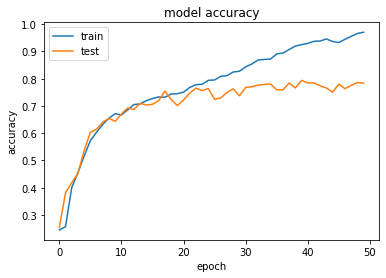

In [ ]:
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#plt.legend(['test'],loc='upper left')
plt.show()

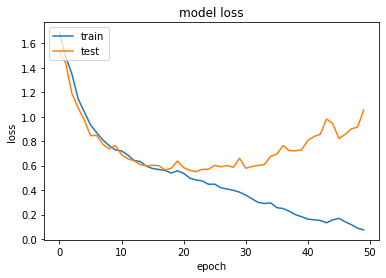

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = cnn_model.predict(Xtest)
y_pred = np.argmax(y_pred,axis=-1)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cm = confusion_matrix(Ytest, y_pred)

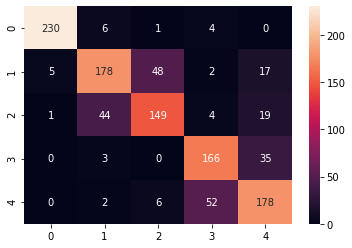

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)
#print(classification_report(Ytrain_one_hot,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       241
           2       0.76      0.71      0.74       250
           3       0.73      0.69      0.71       217
           4       0.73      0.81      0.77       204
           5       0.71      0.75      0.73       238

    accuracy                           0.78      1150
   macro avg       0.78      0.78      0.78      1150
weighted avg       0.79      0.78      0.78      1150



#CNN_LSTM_Model

In [ ]:
from keras.layers import LSTM

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(64,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(64,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 176, 64)           256       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 88, 64)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 86, 128)           24704     
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 84, 512)           197120    
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 82, 1024)          1573888   
_________________________________________________________________
dense_25 (Dense)             (None, 82, 256)           262400    
_________________________________________________________________
dropout_5 (Dropout)          (None, 82, 256)          

In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 12s 578ms/step - loss: 1.7358 - accuracy: 0.1562 - val_loss: 1.5110 - val_accuracy: 0.3261
Epoch 2/50
8/8 [==============================] - 3s 420ms/step - loss: 1.4825 - accuracy: 0.3800 - val_loss: 1.3259 - val_accuracy: 0.3965
Epoch 3/50
8/8 [==============================] - 3s 425ms/step - loss: 1.2500 - accuracy: 0.4433 - val_loss: 1.1329 - val_accuracy: 0.4843
Epoch 4/50
8/8 [==============================] - 3s 425ms/step - loss: 1.1425 - accuracy: 0.4731 - val_loss: 1.1115 - val_accuracy: 0.4791
Epoch 5/50
8/8 [==============================] - 3s 426ms/step - loss: 1.0923 - accuracy: 0.5021 - val_loss: 1.1596 - val_accuracy: 0.4661
Epoch 6/50
8/8 [==============================] - 3s 428ms/step - loss: 1.0875 - accuracy: 0.5087 - val_loss: 1.0655 - val_accuracy: 0.4878
Epoch 7/50
8/8 [==============================] - 3s 429ms/step - loss: 1.0161 - accuracy: 0.5408 - val_loss: 0.9895 - val_accuracy: 0.5487
Epoch 8/50
8/8 [===

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.4908849000930786
accuracy =  0.7708212733268738


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.5084302425384521
accuracy =  0.7617391347885132


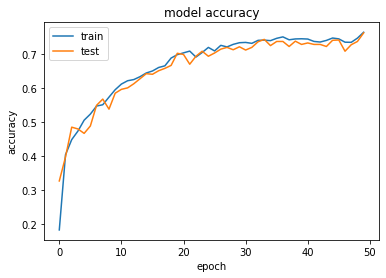

In [ ]:
#print(history_LSTM.history)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
#plt.legend(['test'],loc='upper left')
plt.show()

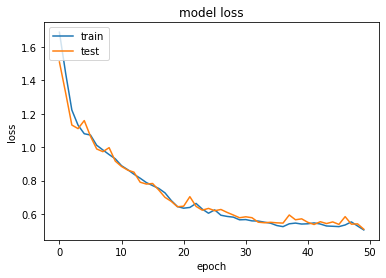

In [ ]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
y_pred = model_LSTM.predict(Xtest)
y_pred = np.argmax(y_pred,axis=-1)

In [ ]:
cm = confusion_matrix(Ytest, y_pred)
print(cm)

[[237   2   2   0   0]
 [  4 152  76   1  17]
 [  2  69 132   2  12]
 [  0   3   3 153  45]
 [  0   4   7  25 202]]


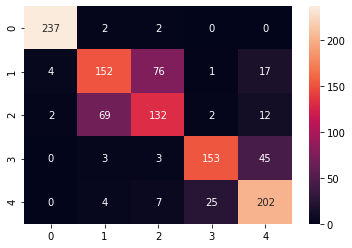

In [ ]:
sns.heatmap(cm,annot=True,fmt='g')

In [ ]:
cp = classification_report(Ytest,y_pred)
print(cp)

              precision    recall  f1-score   support

           1       0.98      0.98      0.98       241
           2       0.66      0.61      0.63       250
           3       0.60      0.61      0.60       217
           4       0.85      0.75      0.79       204
           5       0.73      0.85      0.79       238

    accuracy                           0.76      1150
   macro avg       0.76      0.76      0.76      1150
weighted avg       0.76      0.76      0.76      1150



#CNN & CNN_LSTM Courbe

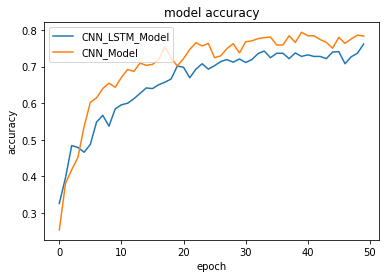

In [ ]:
plt.plot(history_LSTM.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN_LSTM_Model','CNN_Model'],loc='upper left')
plt.show()

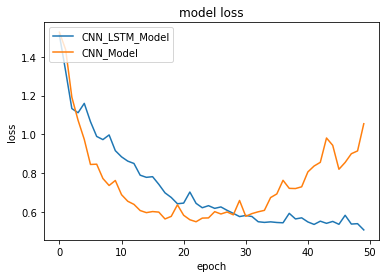

In [ ]:
plt.plot(history_LSTM.history['val_loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['CNN_LSTM_Model','CNN_Model'],loc='upper left')
plt.show()

#CNN_SVM

In [ ]:
X_for_SVM = cnn_model.predict(Xtrain)

In [ ]:
from sklearn.svm import SVC

In [ ]:
SVM_model = SVC(gamma='auto',C=150,kernel='linear')

In [ ]:
SVM_model.fit(X_for_SVM,Ytrain)

SVC(C=150, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
X_test_features = cnn_model.predict(Xtest)

In [ ]:
prediction_SVM = SVM_model.predict(X_test_features)

In [ ]:
from sklearn import metrics

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(Ytest, prediction_SVM))

Accuracy =  0.7721739130434783


In [ ]:
cm = confusion_matrix(Ytest, prediction_SVM)
print(cm)

[[230   6   1   4   0]
 [  6 180  48   3  13]
 [  1  46 149   5  16]
 [  0   3   0 169  32]
 [  0   4   6  68 160]]


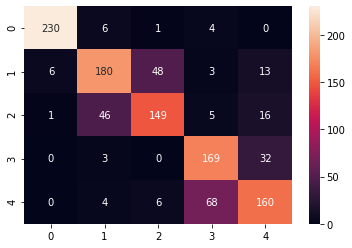

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

In [ ]:
cp = classification_report(Ytest,prediction_SVM)
print(cp)

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       241
           2       0.75      0.72      0.74       250
           3       0.73      0.69      0.71       217
           4       0.68      0.83      0.75       204
           5       0.72      0.67      0.70       238

    accuracy                           0.77      1150
   macro avg       0.77      0.77      0.77      1150
weighted avg       0.78      0.77      0.77      1150



#CNN_RF

In [ ]:
X_For_RF = cnn_model.predict(Xtrain)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_model = RandomForestClassifier(n_estimators=200,criterion='entropy',random_state=42)

In [ ]:
RF_model.fit(X_For_RF,Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
X_test_features = cnn_model.predict(Xtest)

In [ ]:
prediction_RF = RF_model.predict(X_test_features)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(Ytest, prediction_RF))

Accuracy =  0.7678260869565218


In [ ]:
cm = confusion_matrix(Ytest, prediction_RF)

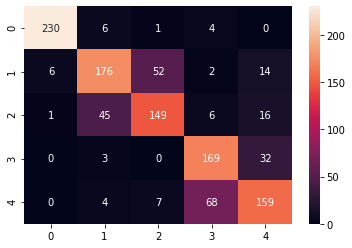

In [ ]:
sns.heatmap(cm, annot=True,fmt='g')

In [ ]:
cp = classification_report(Ytest,prediction_RF)
print(cp)

              precision    recall  f1-score   support

           1       0.97      0.95      0.96       241
           2       0.75      0.70      0.73       250
           3       0.71      0.69      0.70       217
           4       0.68      0.83      0.75       204
           5       0.72      0.67      0.69       238

    accuracy                           0.77      1150
   macro avg       0.77      0.77      0.77      1150
weighted avg       0.77      0.77      0.77      1150



#Bar chart

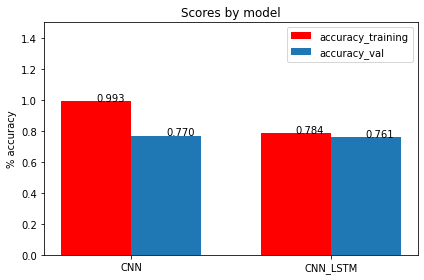

In [ ]:
labels = ['CNN', 'CNN_LSTM']
accuracy_training = [0.993,0.784]
accuracy_val = [0.770, 0.761]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, accuracy_training, width, label='accuracy_training',color='red')
rects2 = ax.bar(x + width/2, accuracy_val, width, label='accuracy_val')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0, 1.5) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

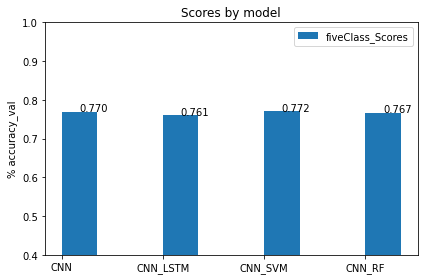

In [ ]:
labels = ['CNN', 'CNN_LSTM', 'CNN_SVM', 'CNN_RF']
#twoClasss_Scores = [0.8713,0.8652,0.8704,0.8704]
fiveClass_Scores = [0.770, 0.761, 0.772, 0.767]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, fiveClass_Scores, width, label='fiveClass_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.4, 1) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

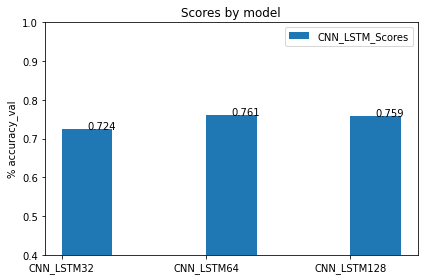

In [ ]:
labels = ['CNN_LSTM32', 'CNN_LSTM64', 'CNN_LSTM128']
#twoClasss_Scores = [0.8713,0.8652,0.8704,0.8704]
CNN_LSTM_Scores = [0.724,0.761, 0.759]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
#rects1 = ax.bar(x - width/2, twoClasss_Scores, width, label='TwoClasss_Scores',color='red')
rects2 = ax.bar(x + width/2, CNN_LSTM_Scores, width, label='CNN_LSTM_Scores')

ax=plt.gca()
for p in ax.patches:
  ax.text(p.get_x()+p.get_width()/2,p.get_height(),'%.3f' % float(p.get_height()))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% accuracy_val')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0.4, 1) 
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

#CNN_LSTM 32

32 neurones

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(32,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(32,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
batch_size = 1350 #elements contains
epochs = 50

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 8s 536ms/step - loss: 1.7706 - accuracy: 0.1913 - val_loss: 1.6488 - val_accuracy: 0.2948
Epoch 2/50
8/8 [==============================] - 3s 391ms/step - loss: 1.5979 - accuracy: 0.3363 - val_loss: 1.4240 - val_accuracy: 0.4200
Epoch 3/50
8/8 [==============================] - 3s 394ms/step - loss: 1.3860 - accuracy: 0.4218 - val_loss: 1.2556 - val_accuracy: 0.4209
Epoch 4/50
8/8 [==============================] - 3s 396ms/step - loss: 1.2141 - accuracy: 0.4423 - val_loss: 1.1663 - val_accuracy: 0.4417
Epoch 5/50
8/8 [==============================] - 3s 396ms/step - loss: 1.1428 - accuracy: 0.4579 - val_loss: 1.0762 - val_accuracy: 0.4939
Epoch 6/50
8/8 [==============================] - 3s 398ms/step - loss: 1.0587 - accuracy: 0.5225 - val_loss: 1.0130 - val_accuracy: 0.5357
Epoch 7/50
8/8 [==============================] - 3s 400ms/step - loss: 1.0312 - accuracy: 0.5338 - val_loss: 1.0058 - val_accuracy: 0.5322
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.5309287905693054
accuracy =  0.7515941858291626


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.5671331882476807
accuracy =  0.7243478298187256


128 neurones

In [ ]:
model_LSTM = Sequential()
model_LSTM.add(Conv1D(64,kernel_size=3,activation='relu',strides=1,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))
model_LSTM.add(MaxPooling1D(pool_size=2,strides=2))

model_LSTM.add(Conv1D(128,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(512,kernel_size=3,activation='relu'))
model_LSTM.add(Conv1D(1024,kernel_size=3,activation='relu'))

#model.add(Flatten())
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(128,activation='tanh',return_sequences=True))
model_LSTM.add(LSTM(128,activation='tanh'))
model_LSTM.add(Dense(256,activation='relu'))
model_LSTM.add(Dense(128,activation='relu'))
model_LSTM.add(Dense(64,activation='relu'))
model_LSTM.add(Dense(Ytrain_one_hot.shape[1], activation = 'softmax'))


In [ ]:
model_LSTM.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
history_LSTM = model_LSTM.fit(Xtrain,Ytrain_one_hot,batch_size = batch_size,epochs=epochs,verbose=1,validation_data=(Xtest,Ytest_one_hot))

Epoch 1/50
8/8 [==============================] - 8s 613ms/step - loss: 1.7422 - accuracy: 0.2201 - val_loss: 1.5100 - val_accuracy: 0.2678
Epoch 2/50
8/8 [==============================] - 4s 461ms/step - loss: 1.4860 - accuracy: 0.3099 - val_loss: 1.3127 - val_accuracy: 0.4400
Epoch 3/50
8/8 [==============================] - 4s 462ms/step - loss: 1.2390 - accuracy: 0.4229 - val_loss: 1.1001 - val_accuracy: 0.4757
Epoch 4/50
8/8 [==============================] - 4s 463ms/step - loss: 1.1791 - accuracy: 0.4564 - val_loss: 1.1168 - val_accuracy: 0.4626
Epoch 5/50
8/8 [==============================] - 4s 463ms/step - loss: 1.0962 - accuracy: 0.4968 - val_loss: 1.0539 - val_accuracy: 0.5174
Epoch 6/50
8/8 [==============================] - 4s 465ms/step - loss: 1.0238 - accuracy: 0.5442 - val_loss: 0.9745 - val_accuracy: 0.5835
Epoch 7/50
8/8 [==============================] - 4s 467ms/step - loss: 0.9528 - accuracy: 0.5853 - val_loss: 0.9462 - val_accuracy: 0.5739
Epoch 8/50
8/8 [====

In [ ]:
score = model_LSTM.evaluate(Xtrain,Ytrain_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.4975532591342926
accuracy =  0.7710145115852356


In [ ]:
score = model_LSTM.evaluate(Xtest,Ytest_one_hot,verbose=0)
print('test loss = ',score[0])
print('accuracy = ',score[1])

test loss =  0.553276777267456
accuracy =  0.7599999904632568
